In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sb
%matplotlib inline

In [2]:
# Load Dataset with all columns
# Making the data columns datetime objects with the parse_dates attribute
bikeshare_full = pd.read_csv('/Users/matthewcassi/Documents/Bike-Sharing-Dataset/less_bikeshare_lat_lon.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
# Removing the Unnamed column
bikeshare_full.drop('Unnamed: 0', 1, inplace=True)

In [3]:
# Copying the dataset
bikeshare_machine = bikeshare_full.copy()
bikeshare_machine.head(10)

,Start date,End date,start_station,start_station_code,end_station,end_station_code,Member Type,start_date_short,end_date_short,time_diff,...,workingday,weathersit,temp,hum,windspeed,start_lat,start_lon,end_lat,end_lon,miles
0,2011-03-31 23:58:00,2011-04-01 00:00:00,14th & Harvard St NW,31105.0,16th & Harvard St NW,31103.0,Registered,2011-03-31,2011-04-01,1.833,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.926088,-77.036536,0.238743
1,2011-03-31 23:47:00,2011-03-31 23:50:00,Lincoln Park / 13th & East Capitol St NE,31619.0,13th & H St NE,31611.0,Registered,2011-03-31,2011-03-31,3.317,...,1,3,0.268333,0.918333,0.217646,38.890461,-76.988355,38.900022,-76.988422,0.659533
2,2011-03-31 23:45:00,2011-03-31 23:50:00,14th & R St NW,31202.0,Massachusetts Ave & Dupont Circle NW,31200.0,Registered,2011-03-31,2011-03-31,5.733,...,1,3,0.268333,0.918333,0.217646,38.912939,-77.032085,38.910100,-77.044400,0.691996
3,2011-03-31 23:34:00,2011-03-31 23:43:00,Park Rd & Holmead Pl NW,31602.0,15th & P St NW,31201.0,Registered,2011-03-31,2011-03-31,8.700,...,1,3,0.268333,0.918333,0.217646,38.930800,-77.031500,38.909850,-77.034438,1.453796
4,2011-03-31 23:31:00,2011-03-31 23:39:00,37th & O St NW / Georgetown University,31236.0,21st & M St NW,31212.0,Registered,2011-03-31,2011-03-31,7.850,...,1,3,0.268333,0.918333,0.217646,38.907740,-77.071652,38.905340,-77.046774,1.351053
5,2011-03-31 23:30:00,2011-03-31 23:33:00,14th & Harvard St NW,31105.0,14th & V St NW,31101.0,Registered,2011-03-31,2011-03-31,2.933,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.917600,-77.032100,0.634647
6,2011-03-31 23:29:00,2011-03-31 23:39:00,Lamont & Mt Pleasant NW,31107.0,7th & T St NW,31109.0,Registered,2011-03-31,2011-03-31,9.917,...,1,3,0.268333,0.918333,0.217646,38.931900,-77.038800,38.915500,-77.022200,1.442193
7,2011-03-31 23:28:00,2011-03-31 23:45:00,13th St & New York Ave NW,31227.0,Georgia Ave and Fairmont St NW,31207.0,Registered,2011-03-31,2011-03-31,17.100,...,1,3,0.268333,0.918333,0.217646,38.900283,-77.029822,38.924900,-77.022200,1.747077
8,2011-03-31 23:25:00,2011-03-31 23:29:00,New York Ave & 15th St NW,31222.0,20th & E St NW,31204.0,Registered,2011-03-31,2011-03-31,4.500,...,1,3,0.268333,0.918333,0.217646,38.899100,-77.033700,38.896300,-77.045000,0.639011
9,2011-03-31 23:21:00,2011-03-31 23:44:00,Calvert St & Woodley Pl NW,31106.0,14th St & Spring Rd NW,31401.0,Registered,2011-03-31,2011-03-31,22.667,...,1,3,0.268333,0.918333,0.217646,38.923583,-77.050046,38.937500,-77.032800,1.336057


In [4]:
# creating a list of columns which will be used to create the list of columns to keep for the machine
# learning piece
list(bikeshare_machine.columns)

['Start date',
 'End date',
 'start_station',
 'start_station_code',
 'end_station',
 'end_station_code',
 'Member Type',
 'start_date_short',
 'end_date_short',
 'time_diff',
 'season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'start_lat',
 'start_lon',
 'end_lat',
 'end_lon',
 'miles']

In [5]:
# Selecting the columns that are needed for the analysis
included_cols = ['start_station',
                 'end_station',
                 'Member Type',
                 'time_diff',
                 'season',
                 'mnth',
                 'holiday',
                 'weekday',
                 'workingday',
                 'weathersit',
                 'temp',
                 'hum',
                 'windspeed',
                 'miles']
# Subsetting the dataset so that only the columns above are included
bikeshare_machine = bikeshare_machine[included_cols]
bikeshare_machine.head()

,start_station,end_station,Member Type,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,miles
0,14th & Harvard St NW,16th & Harvard St NW,Registered,1.833,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.238743
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,Registered,3.317,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.659533
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,Registered,5.733,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.691996
3,Park Rd & Holmead Pl NW,15th & P St NW,Registered,8.700,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.453796
4,37th & O St NW / Georgetown University,21st & M St NW,Registered,7.850,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.351053


In [6]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
Member Type      1219847 non-null object
time_diff        1219847 non-null float64
season           1219847 non-null int64
mnth             1219847 non-null int64
holiday          1219847 non-null int64
weekday          1219847 non-null int64
workingday       1219847 non-null int64
weathersit       1219847 non-null int64
temp             1219847 non-null float64
hum              1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 130.3+ MB


In [7]:
bikeshare_machine['season'] = bikeshare_machine['season'].astype('category')
bikeshare_machine['mnth'] = bikeshare_machine['mnth'].astype('category')
bikeshare_machine['holiday'] = bikeshare_machine['holiday'].astype('category')
bikeshare_machine['weekday'] = bikeshare_machine['weekday'].astype('category')
bikeshare_machine['workingday'] = bikeshare_machine['workingday'].astype('category')
bikeshare_machine['weathersit'] = bikeshare_machine['weathersit'].astype('category')
bikeshare_machine['Member Type'] = bikeshare_machine['Member Type'].astype('category')

In [8]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
Member Type      1219847 non-null category
time_diff        1219847 non-null float64
season           1219847 non-null category
mnth             1219847 non-null category
holiday          1219847 non-null category
weekday          1219847 non-null category
workingday       1219847 non-null category
weathersit       1219847 non-null category
temp             1219847 non-null float64
hum              1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: category(7), float64(5), object(2)
memory usage: 73.3+ MB


In [9]:
col_names = ['start_station', 'end_station','member_type','time_diff','season','month','holiday',
             'weekday','work_day','weather_cat','temp','humidity','windspeed','miles']
bikeshare_machine.columns = col_names

In [10]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
member_type      1219847 non-null category
time_diff        1219847 non-null float64
season           1219847 non-null category
month            1219847 non-null category
holiday          1219847 non-null category
weekday          1219847 non-null category
work_day         1219847 non-null category
weather_cat      1219847 non-null category
temp             1219847 non-null float64
humidity         1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: category(7), float64(5), object(2)
memory usage: 73.3+ MB


In [11]:
bikeshare_machine['holiday'].describe()

count     1219847
unique          2
top             0
freq      1191865
Name: holiday, dtype: int64

In [12]:
bikeshare_dummy = pd.get_dummies(bikeshare_machine, 
                                 columns=['member_type','season','month','holiday',
                                          'weekday','work_day','weather_cat'])
bikeshare_dummy.head()

,start_station,end_station,time_diff,temp,humidity,windspeed,miles,member_type_Casual,member_type_Registered,season_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,work_day_0,work_day_1,weather_cat_1,weather_cat_2,weather_cat_3
0,14th & Harvard St NW,16th & Harvard St NW,1.833,0.268333,0.918333,0.217646,0.238743,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,3.317,0.268333,0.918333,0.217646,0.659533,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,5.733,0.268333,0.918333,0.217646,0.691996,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,Park Rd & Holmead Pl NW,15th & P St NW,8.700,0.268333,0.918333,0.217646,1.453796,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,37th & O St NW / Georgetown University,21st & M St NW,7.850,0.268333,0.918333,0.217646,1.351053,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [13]:
bikeshare_dummy.columns

Index(['start_station', 'end_station', 'time_diff', 'temp', 'humidity',
       'windspeed', 'miles', 'member_type_Casual', 'member_type_Registered',
       'season_1', 'season_2', 'season_3', 'season_4', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'holiday_0', 'holiday_1',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'work_day_0', 'work_day_1', 'weather_cat_1',
       'weather_cat_2', 'weather_cat_3'],
      dtype='object')

In [21]:
column_names = ['start_station', 'end_station', 'time_diff', 'temp', 'humidity',
       'windspeed', 'miles', 'casual', 'registered',
       'spring', 'summer', 'fall', 'winter', 'jan', 'feb',
       'march', 'april', 'may', 'june', 'july', 'august',
       'sept', 'oct', 'nov', 'dec', 'notholiday', 'holiday',
       'sun', 'mon', 'tues', 'wed', 'thurs', 'fri',
       'sat', 'not_work_day', 'work_day', 'sunny',
       'cloudy', 'rainy']
bikeshare_dummy.columns = column_names
bikeshare_dummy.head()

,start_station,end_station,time_diff,temp,humidity,windspeed,miles,casual,registered,spring,...,tues,wed,thurs,fri,sat,not_work_day,work_day,sunny,cloudy,rainy
261044,Calvert St & Woodley Pl NW,Adams Mill & Columbia Rd NW,4.583,0.602500,0.626667,0.120650,0.404806,1,0,0,...,0,0,0,0,1,1,0,1,0,0
439868,10th St & Constitution Ave NW,10th St & Constitution Ave NW,66.933,0.507500,0.695000,0.178483,0.000000,1,0,0,...,0,0,0,0,0,1,0,1,0,0
867363,Georgia & New Hampshire Ave NW,14th & V St NW,9.067,0.421667,0.741250,0.099513,1.334061,0,1,0,...,0,0,0,0,0,1,0,1,0,0
577751,15th & P St NW,14th & Harvard St NW,9.000,0.716667,0.755000,0.228250,1.175429,0,1,0,...,0,0,0,0,1,1,0,0,1,0
118450,3rd & H St NE,8th & H St NW,12.800,0.696667,0.434167,0.185312,1.140401,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [22]:
bikeshare_dummy.describe()

,time_diff,temp,humidity,windspeed,miles,casual,registered,spring,summer,fall,...,tues,wed,thurs,fri,sat,not_work_day,work_day,sunny,cloudy,rainy
count,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,...,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06,1.219847e+06
mean,1.421168e+01,5.054460e-01,6.321565e-01,1.883811e-01,1.157501e+00,1.669275e-01,8.330725e-01,2.863171e-01,2.541081e-01,2.562772e-01,...,1.469176e-01,1.396634e-01,1.469119e-01,1.480546e-01,1.411718e-01,2.994966e-01,7.005034e-01,6.647227e-01,3.180055e-01,1.727184e-02
std,1.170567e+01,1.746302e-01,1.406091e-01,7.650168e-02,7.465561e-01,3.729113e-01,3.729113e-01,4.520396e-01,4.353588e-01,4.365769e-01,...,3.540239e-01,3.466376e-01,3.540182e-01,3.551543e-01,3.481988e-01,4.580377e-01,4.580377e-01,4.720875e-01,4.657018e-01,1.302825e-01
min,5.000000e-01,5.913040e-02,0.000000e+00,2.239170e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.800000e+00,3.566670e-01,5.225000e-01,1.331000e-01,6.324253e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.093300e+01,5.125000e-01,6.341670e-01,1.834710e-01,9.883257e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.758300e+01,6.600000e-01,7.345830e-01,2.300920e-01,1.538687e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,7.998300e+01,8.491670e-01,9.725000e-01,5.074630e-01,8.543898e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [23]:
from sklearn.utils import shuffle
bikeshare_dummy = shuffle(bikeshare_dummy)

In [24]:
#bikeshare_dummy.to_csv('bikeshare_dummy.csv')

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [27]:
columns = ['temp', 'humidity','windspeed', 'miles', 'casual', 'registered', 'spring', 'summer',
       'fall', 'winter', 'jan', 'feb', 'march', 'april', 'may', 'june', 'july',
       'august', 'sept', 'oct', 'nov', 'dec', 'notholiday', 'holiday',
       'sun', 'mon', 'tues', 'wed', 'thurs', 'fri',
       'sat', 'not_work_day', 'work_day', 'sunny', 'cloudy', 'rainy']
X = bikeshare_dummy[columns]
y = bikeshare_dummy['time_diff']

In [30]:
X.head(20)

,temp,humidity,windspeed,miles,casual,registered,spring,summer,fall,winter,...,tues,wed,thurs,fri,sat,not_work_day,work_day,sunny,cloudy,rainy
726195,0.258333,0.560833,0.243167,0.738190,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
677542,0.750000,0.651250,0.159200,0.409118,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
855608,0.470000,0.812917,0.197763,0.999676,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
703403,0.311667,0.636667,0.134337,2.423329,0,1,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1029818,0.282609,0.622174,0.153800,0.807363,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
321816,0.549167,0.730000,0.183454,1.357076,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1126350,0.287500,0.350417,0.225750,1.610872,0,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
109293,0.138333,0.434167,0.361950,0.628440,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
51265,0.343478,0.680000,0.125248,0.840870,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
424174,0.609167,0.972500,0.078367,0.930921,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914885, 36)
(914885,)
(304962, 36)
(304962,)


In [39]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1_pred = model_1.predict(X_test)
model_1_train_score = model_1.score(X_train, y_train)
model_1_r_squared = model_1.score(X_test, y_test)
model_1_mse = mean_squared_error(y_test, model_1_pred)
model_1_rmse = np.sqrt(model_1_mse)

In [40]:
print(model_1_train_score)
print(model_1_test_score)
print(model_1_mse)
print(model_1_rmse)

0.372175719706
0.375195344841
85.5019446088
9.24672615626


In [45]:
adjusted_r = 1 - (1-model_1_r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r)

0.375121579268


In [66]:
cvscores_10_model_1 = cross_val_score(model_1, X_train, y_train, cv=10)

In [67]:
cvscores_10_model_1

array([ 0.37186137,  0.37314158,  0.37288449,  0.37568078,  0.37588312,
        0.36754704,  0.37182135,  0.3727359 ,  0.37171376,  0.37093931])

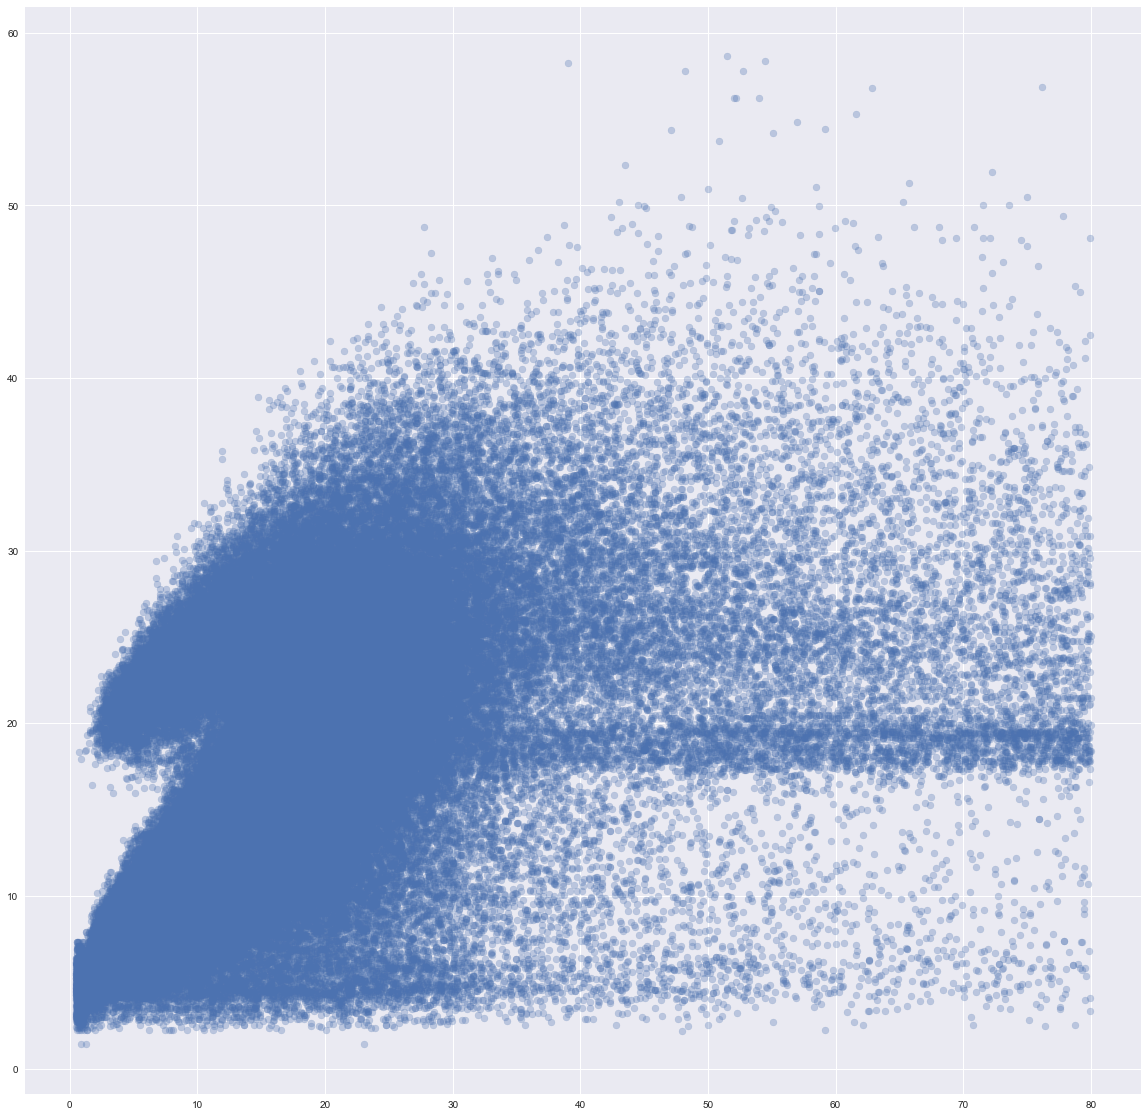

In [38]:
plt.figure(figsize=(20,20))
plt.scatter(y_test, model_1_pred, alpha=0.3)